In [1]:
!python --version

Python 3.6.4 :: Anaconda custom (64-bit)


In [2]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Constants:

$\Omega $ = initial Ω rotation of earth in radians/years, with respect to distant stars

$\omega $ = initial ω revolution of moon in radians/secs

$M$ = mass of Earth

$R$ = radius of Earth

$N_{B}$ = Normal force

$r$ = radius of moon's orbit

$m$ = mass of Moon

$\eta$ = percentage of energy lost by the earth due to tidal friction that goes to the moon

$\mu$ = coefficient of friction

$G$ = Gravitational constant in SI units

$\gamma$ = product of G and M; known as the Standard Gravitational Parameter


The following constants were coded as the following: 

$\Omega $ as Om0, $\omega $ as om0, $M$ as M, $R$ as R, $N_{B}$ as N_B, $r$ as r, $m$ as m, $\eta$ as eta, $\mu$ as u ,$G$ as G, and $\gamma$ as Y

# The Equations:

### Earth's Rotational Velocity, Ω(t)

\begin{align}
-\mu_{k}N_{B}(\Omega-\omega)=\frac{2}{5}MR_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)
\end{align}

### The Moon's Angular Velocity, ω(t)

\begin{align}
\frac{6}{5}\eta MR^{2}_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)=\gamma^{\frac{2}{3}}m\omega^{-\frac{1}{3}}\bigg(\frac{d\omega}{dt}\bigg)
\end{align}

### Earth-Moon Distance, r(t)

\begin{align}
r=\gamma^{\frac{1}{3}}\omega^{-\frac{2}{3}}
\end{align}

# Solving for Ω(t) and ω(t):


$\big(\frac{d\Omega}{dt}\big)=-\frac{5}{2}\frac{\mu_{k}N_{B}(\Omega-\omega)}{MR_{E}\Omega},\big(\frac{d\omega}{dt}\big)=\frac{6}{5}\frac{\eta MR^{2}_{E}\Omega}{\gamma^{\frac{2}{3}}m\omega^{-\frac{1}{3}}}\big(\frac{d\Omega}{dt}\big)$


In [3]:
Om0=2301.21649
om0=84.889944
M=5.972*(10**24.0)
R=6371000.0
NB=1.02992455*(10**37) 
r=1737400.0  
m=7.34767309*(10**22.0)
eta=1.0/30.0 
u=0.5731*10**(-12) 
G=66425.34 
Y = G*M
#d0 = 384400000

def W_dt(W, t):
    return [(-5*u*NB*(W[0]-W[1]))/(2*M*R*W[0]), 
            ((6*eta*M*(R**2)*W[0])/(5*Y**(2/3)*m*W[1]**(-1/3)))*(-5*u*NB*(W[0]-W[1]))/(2*M*R*W[0])]

ts = np.arange(0,10*10**10,10**7)
W0 = [Om0, om0]
Ws = odeint(W_dt, W0, ts)
Earth = np.array(Ws[:,0])
Moon = np.array(Ws[:,1])

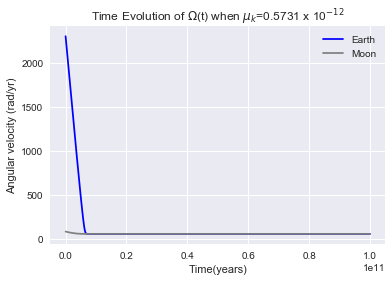

In [4]:
plt.plot(ts, Earth, label="Earth", c='blue')
plt.plot(ts, Moon, label="Moon", c='gray')
plt.xlabel("Time(years)")
plt.ylabel("Angular velocity (rad/yr)")
plt.title('Time Evolution of $\Omega$(t) when $\mu$$_k$=0.5731 x 10$^{-12}$')
plt.legend()

Zooming in...

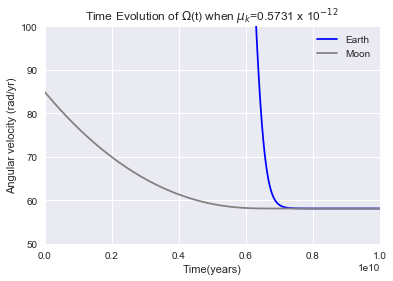

In [5]:
plt.plot(ts, Earth, label="Earth", c='blue')
plt.plot(ts, Moon, label="Moon", c='gray')
plt.xlabel("Time(years)")
plt.ylabel("Angular velocity (rad/yr)")
plt.title('Time Evolution of $\Omega$(t) when $\mu$$_k$=0.5731 x 10$^{-12}$')
plt.ylim(50,100)
plt.xlim(0,1*10**10)
plt.legend()

Ω(t) and ω(t) will achieve 99% double synchronous orbit in:

In [6]:
print(str(ts[np.where(Moon/Earth < 0.99)][-1])+ " years")

7050000000 years


Ω(t) and ω(t) will be equal in:

In [7]:
print(str(ts[np.where(Moon/Earth == 1)][0])+ " years")

93940000000 years


# Solving for r(t):


$r=\gamma^{\frac{1}{3}}\omega^{-\frac{2}{3}}$


Text(0.5,1,'Earth-Moon Distance, r(t)')

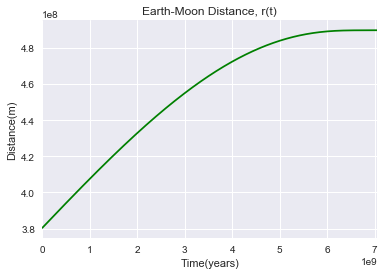

In [8]:
r=np.array((Y**(1/3))*Moon**(-2/3))
plt.plot(ts, r, c='green')
plt.xlim(0,ts[np.where(Moon/Earth < 0.99)][-1])
plt.xlabel("Time(years)")
plt.ylabel("Distance(m)")
plt.title('Earth-Moon Distance, r(t)')

Initial Earth-Moon distance, $r(0)$:

In [9]:
print(str(r[0])+ " m")

380405712.7192103 m


$r(t)$ when $\frac{ω(t)}{Ω(t)} = 1$

In [10]:
print(str(r[-1])+" m")

489728491.851162 m


$r(t)$ when $\frac{ω(t)}{Ω(t)} \leq 0.99$

In [11]:
print(str(r[np.where(Moon/Earth <= 0.99)][-1])+ " m")

489726597.335154 m


## Plot

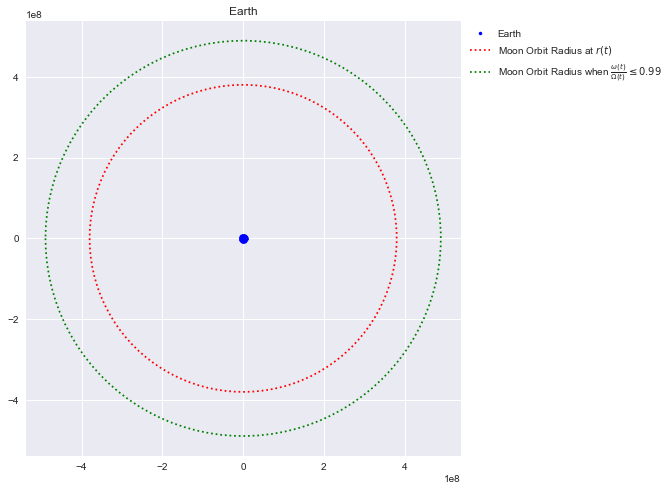

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Earth")
ax.set_aspect("equal")

Earth_r = 6371000
x = Earth_r*np.cos(np.linspace(-np.pi,np.pi,100))
y = Earth_r*np.sin(np.linspace(-np.pi,np.pi,100))

x1 = r[0]*np.cos(np.linspace(-np.pi,np.pi,100))
y1 = r[0]*np.sin(np.linspace(-np.pi,np.pi,100))

x2 = r[np.where(Moon/Earth <= 0.99)][-1]*np.cos(np.linspace(-np.pi,np.pi,100))
y2 = r[np.where(Moon/Earth <= 0.99)][-1]*np.sin(np.linspace(-np.pi,np.pi,100))

ax.plot(x,y, fillstyle="full", label="Earth", color="none", marker='.', markerfacecolor="blue")
ax.fill(x, y) 
ax.plot(x1,y1,"red", label="Moon Orbit Radius at " r'$r(t)$', ls=":")
ax.plot(x2,y2,"green", label="Moon Orbit Radius when "  r'$\frac{ω(t)}{Ω(t)} \leq 0.99$', ls=":")
plt.legend(bbox_to_anchor=(1, 1))